# Convergence of Green function calculation
We check the convergence with $N_\text{kpt}$ for the calculation of the vacancy Green function for FCC and HCP structures. In particular, we will look at:

1. The $\mathbf{R}=0$ value,
2. The largest $\mathbf{R}$ value in the calculation of a first neighbor thermodynamic interaction range,
3. The difference of the Green function value for (1) and (2),

with increasing k-point density.

In [1]:
import sys
sys.path.extend(['../'])
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import onsager.crystal as crystal
import onsager.GFcalc as GFcalc

Create an FCC and HCP lattice.

In [2]:
a0 = 1.
FCC, HCP = crystal.Crystal.FCC(a0, "fcc"), crystal.Crystal.HCP(a0, chemistry="hcp")
print(FCC)
print(HCP)

#Lattice:
  a1 = [ 0.   0.5  0.5]
  a2 = [ 0.5  0.   0.5]
  a3 = [ 0.5  0.5  0. ]
#Basis:
  (fcc) 0.0 = [ 0.  0.  0.]
#Lattice:
  a1 = [ 0.5       -0.8660254  0.       ]
  a2 = [ 0.5        0.8660254  0.       ]
  a3 = [ 0.          0.          1.63299316]
#Basis:
  (hcp) 0.0 = [ 0.33333333  0.66666667  0.25      ]
  (hcp) 0.1 = [ 0.66666667  0.33333333  0.75      ]


We will put together our vectors for consideration:

* Maximum $\mathbf{R}$ for FCC = (400), or $\mathbf{x}=2\hat j+2\hat k$.
* Maximum $\mathbf{R}$ for HCP = (440), or $\mathbf{x}=4\hat i$, and (222), or $\mathbf{x}=2\hat i + 2\sqrt{8/3}\hat k$.

and our sitelists and jumpnetworks.

In [3]:
FCCR = np.array([0,2.,2.])
HCPR1, HCPR2 = np.array([4.,0.,0.]), np.array([2.,0.,2*np.sqrt(8/3)])

In [4]:
FCCsite, FCCjn = FCC.sitelist(0), FCC.jumpnetwork(0, 0.75)
HCPsite, HCPjn = HCP.sitelist(0), HCP.jumpnetwork(0, 1.01)

We use $N_\text{max}$ parameter, which controls the automated generation of k-points to iterate through successively denser k-point meshes.

In [5]:
FCCdata = {pmaxerror:[] for pmaxerror in range(-16,0)}
print('kpt\tNkpt\tG(0)\tG(R)\tG diff')
for Nmax in range(1,13):
    GFFCC = GFcalc.GFCrystalcalc(FCC, 0, FCCsite, FCCjn, Nmax=Nmax)
    Nreduce, Nkpt, kpt = GFFCC.Nkpt, np.prod(GFFCC.kptgrid), GFFCC.kptgrid
    for pmax in sorted(FCCdata.keys(), reverse=True):
        GFFCC.SetRates(np.ones(1), np.zeros(1), np.ones(1)/12, np.zeros(1), 10**(pmax))
        g0,gR = GFFCC(0,0,np.zeros(3)), GFFCC(0,0,FCCR)
        FCCdata[pmax].append((Nkpt, g0, gR))
    Nkpt,g0,gR = FCCdata[-8][-1]  # print the 10^-8 values
    print("{k[0]}x{k[1]}x{k[2]}\t".format(k=kpt) + 
          " {:5d} ({})\t{:.12f}\t{:.12f}\t{:.12f}".format(Nkpt, Nreduce, 
                                                               g0, gR,g0-gR))

kpt	Nkpt	G(0)	G(R)	G diff
6x6x6	   216 (16)	-1.344901582401	-0.119888361621	-1.225013220779
10x10x10	  1000 (48)	-1.344674624975	-0.084566077531	-1.260108547444
14x14x14	  2744 (106)	-1.344663672542	-0.084541308263	-1.260122364278
18x18x18	  5832 (200)	-1.344661890661	-0.084539383601	-1.260122507060
22x22x22	 10648 (337)	-1.344661442418	-0.084538941204	-1.260122501213
26x26x26	 17576 (528)	-1.344661295591	-0.084538798573	-1.260122497018
30x30x30	 27000 (778)	-1.344661238153	-0.084538742761	-1.260122495392
34x34x34	 39304 (1095)	-1.344661212587	-0.084538717850	-1.260122494737
38x38x38	 54872 (1491)	-1.344661200055	-0.084538705591	-1.260122494464
42x42x42	 74088 (1971)	-1.344661193423	-0.084538699082	-1.260122494341
46x46x46	 97336 (2545)	-1.344661189691	-0.084538695410	-1.260122494281
50x50x50	 125000 (3218)	-1.344661187483	-0.084538693232	-1.260122494251


In [6]:
HCPdata = []
print('kpt\tNkpt\tG(0)\tG(R1)\tG(R2)\tG(R1)-G(0)\tG(R2)-G0')
for Nmax in range(1,13):
    GFHCP = GFcalc.GFCrystalcalc(HCP, 0, HCPsite, HCPjn, Nmax=Nmax)
    GFHCP.SetRates(np.ones(1), np.zeros(1), np.ones(2)/12, np.zeros(2), 1e-8)
    g0,gR1,gR2 = GFHCP(0,0,np.zeros(3)), GFHCP(0,0,HCPR1), GFHCP(0,0,HCPR2)
    Nreduce, Nkpt, kpt = GFHCP.Nkpt, np.prod(GFHCP.kptgrid), GFHCP.kptgrid
    HCPdata.append((Nkpt, g0, gR1, gR2))
    print("{k[0]}x{k[1]}x{k[2]}\t".format(k=kpt) + 
          "{:5d} ({})\t{:.12f}\t{:.12f}\t{:.12f}\t{:.12f}\t{:.12f}".format(Nkpt, Nreduce,
                                                                                  g0, gR1, gR2, 
                                                                                  g0-gR1, g0-gR2))

kpt	Nkpt	G(0)	G(R1)	G(R2)	G(R1)-G(0)	G(R2)-G0
6x6x4	  144 (21)	-1.367909503563	-0.192892722514	-0.131552967388	-1.175016781049	-1.236356536175
10x10x6	  600 (56)	-1.345034474341	-0.087913619020	-0.089866654871	-1.257120855321	-1.255167819470
16x16x8	 2048 (150)	-1.344668575390	-0.084546609595	-0.088212957806	-1.260121965795	-1.256455617584
20x20x12	 4800 (308)	-1.344662392185	-0.084539941251	-0.088166498574	-1.260122450934	-1.256495893611
26x26x14	 9464 (560)	-1.344661615456	-0.084539088966	-0.088165768509	-1.260122526490	-1.256495846946
30x30x16	14400 (819)	-1.344661401027	-0.084538892419	-0.088165529659	-1.260122508608	-1.256495871368
36x36x20	25920 (1397)	-1.344661260564	-0.084538764009	-0.088165374312	-1.260122496555	-1.256495886252
40x40x22	35200 (1848)	-1.344661230214	-0.084538734661	-0.088165342770	-1.260122495553	-1.256495887444
46x46x24	50784 (2600)	-1.344661210808	-0.084538715598	-0.088165322977	-1.260122495211	-1.256495887832
50x50x28	70000 (3510)	-1.344661197817	-0.08453870

First, look at the behavior of the error with $p_\text{max}$(error) parameter. The k-point integration error scales as $N_\text{kpt}^{5/3}$, and we see the $p_\text{max}$ error is approximately $10^{-8}$.

In [7]:
print('pmax\tGinf\talpha (Nkpt^-5/3 prefactor)')
Ginflist=[]
for pmax in sorted(FCCdata.keys(), reverse=True):
    data = FCCdata[pmax]
    Nk53 = np.array([N**(5/3) for (N,g0,gR) in data])
    gval = np.array([g0 for (N,g0,gR) in data])
    N10,N5 = np.average(Nk53*Nk53),np.average(Nk53)
    g10,g5 = np.average(gval*Nk53*Nk53),np.average(gval*Nk53)
    denom = N10-N5**2
    Ginf,alpha = (g10-g5*N5)/denom, (g10*N5-g5*N10)/denom
    Ginflist.append(Ginf)
    print('{}\t{}\t{}'.format(pmax, Ginf, alpha))

pmax	Ginf	alpha (Nkpt^-5/3 prefactor)
-1	-1.3622362852792858	203.75410596197204
-2	-1.345225052792947	24.479334937158068
-3	-1.3446883432274557	3.322356166765774
-4	-1.3446627820660566	1.186618137589885
-5	-1.344661289561045	1.0554418717631806
-6	-1.3446611908160067	1.1378852023509276
-7	-1.3446611836353533	1.2547347330078438
-8	-1.344661182870995	1.403893171115624
-9	-1.344661182337601	1.6081890775249583
-10	-1.3446611814380371	1.8951451743398244
-11	-1.3446611800056545	2.291136009713601
-12	-1.344661177927421	2.8185182806123508
-13	-1.3446611751184294	3.4945030859983652
-14	-1.3446611715189616	4.331229854988949
-15	-1.3446611670905142	5.336529960337354
-16	-1.3446611618106175	6.514974709092111


Plot the error in the Green function for FCC (at 0, maximum R, and difference between those GF). We extract the infinite value by fitting the error to $N_{\mathrm{kpt}}^{-5/3}$, which empirically matches the numerical error.

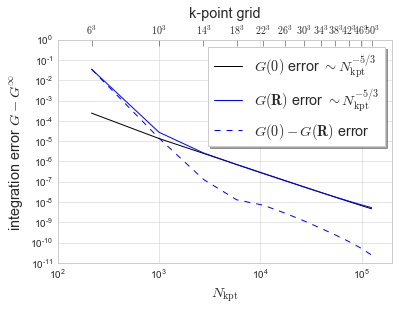

In [8]:
# plot the errors from pmax = 10^-8
data = FCCdata[-8]
Nk = np.array([N for (N,g0,gR) in data])
g0val = np.array([g0 for (N,g0,gR) in data])
gRval = np.array([gR for (N,g0,gR) in data])

gplot = []
Nk53 = np.array([N**(5/3) for (N,g0,gR) in data])
for gdata, start in zip((g0val, gRval, g0val-gRval), (0,1,2)):
    N10,N5 = np.average(Nk53[start:]*Nk53[start:]),np.average(Nk53[start:])
    denom = N10-N5**2
    g10 = np.average(gdata[start:]*Nk53[start:]*Nk53[start:])
    g5 = np.average(gdata[start:]*Nk53[start:])
    Ginf,alpha = (g10-g5*N5)/denom, (g10*N5-g5*N10)/denom
    gplot.append(np.abs(gdata-Ginf))

fig, ax1 = plt.subplots()
ax1.plot(Nk, gplot[0], 'k', label='$G(\mathbf{0})$ error $\sim N_{\mathrm{kpt}}^{-5/3}$')
ax1.plot(Nk, gplot[1], 'b', label='$G(\mathbf{R})$ error $\sim N_{\mathrm{kpt}}^{-5/3}$')
ax1.plot(Nk, gplot[2], 'b--', label='$G(\mathbf{0})-G(\mathbf{R})$ error')
ax1.set_xlim((1e2,2e5))
ax1.set_ylim((1e-11,1))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('$N_{\mathrm{kpt}}$', fontsize='x-large')
ax1.set_ylabel('integration error $G-G^\infty$', fontsize='x-large')
ax1.legend(bbox_to_anchor=(0.6,0.6,0.4,0.4), ncol=1, 
           shadow=True, frameon=True, fontsize='x-large')
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([n for n in Nk])
ax2.set_xticklabels(["${:.0f}^3$".format(n**(1/3)) for n in Nk])
ax2.set_xlabel('k-point grid', fontsize='x-large')
ax2.grid(False)
ax2.tick_params(axis='x', top='on', direction='in', length=6)
plt.show()
# plt.savefig('FCC-GFerror.pdf', transparent=True, format='pdf')

Plot the error in Green function for HCP.

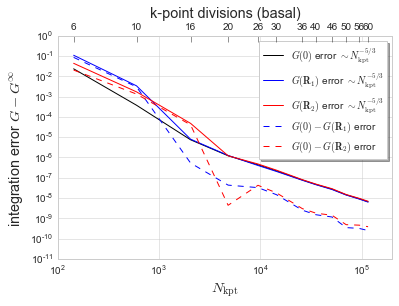

In [9]:
# plot the errors from pmax = 10^-8
data = HCPdata
Nk = np.array([N for (N,g0,gR1,gR2) in data])
g0val = np.array([g0 for (N,g0,gR1,gR2) in data])
gR1val = np.array([gR1 for (N,g0,gR1,gR2) in data])
gR2val = np.array([gR2 for (N,g0,gR1,gR2) in data])

gplot = []
Nk53 = np.array([N**(5/3) for (N,g0,gR1,gR2) in data])
for gdata, start in zip((g0val, gR1val, gR2val, g0val-gR1val, g0val-gR2val), (3,3,3,3,3)):
    N10,N5 = np.average(Nk53[start:]*Nk53[start:]),np.average(Nk53[start:])
    denom = N10-N5**2
    g10 = np.average(gdata[start:]*Nk53[start:]*Nk53[start:])
    g5 = np.average(gdata[start:]*Nk53[start:])
    Ginf,alpha = (g10-g5*N5)/denom, (g10*N5-g5*N10)/denom
    gplot.append(np.abs(gdata-Ginf))

fig, ax1 = plt.subplots()
ax1.plot(Nk, gplot[0], 'k', label='$G(\mathbf{0})$ error $\sim N_{\mathrm{kpt}}^{-5/3}$')
ax1.plot(Nk, gplot[1], 'b', label='$G(\mathbf{R}_1)$ error $\sim N_{\mathrm{kpt}}^{-5/3}$')
ax1.plot(Nk, gplot[2], 'r', label='$G(\mathbf{R}_2)$ error $\sim N_{\mathrm{kpt}}^{-5/3}$')
ax1.plot(Nk, gplot[3], 'b--', label='$G(\mathbf{0})-G(\mathbf{R}_1)$ error')
ax1.plot(Nk, gplot[4], 'r--', label='$G(\mathbf{0})-G(\mathbf{R}_2)$ error')
ax1.set_xlim((1e2,2e5))
ax1.set_ylim((1e-11,1))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('$N_{\mathrm{kpt}}$', fontsize='x-large')
ax1.set_ylabel('integration error $G-G^\infty$', fontsize='x-large')
ax1.legend(bbox_to_anchor=(0.6,0.6,0.4,0.4), ncol=1, 
           shadow=True, frameon=True, fontsize='medium')
ax2 = ax1.twiny()
ax2.set_xscale('log')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([n for n in Nk])
# ax2.set_xticklabels(["${:.0f}$".format((n*1.875)**(1/3)) for n in Nk])
ax2.set_xticklabels(['6','10','16','20','26','30','36','40','46','50','56','60'])
ax2.set_xlabel('k-point divisions (basal)', fontsize='x-large')
ax2.grid(False)
ax2.tick_params(axis='x', top='on', direction='in', length=6)
plt.show()
# plt.savefig('HCP-GFerror.pdf', transparent=True, format='pdf')